In [1]:
#numpy digunakan untuk melakukan perhitungan pada data seperti mean, median, dll
import numpy as np
#pandas digunakan untuk membaca data
import pandas as pd
#matplotlib digunakan untuk membuat grafik
import matplotlib.pyplot as plt
#seaborn digunakan untuk membuat grafik
import seaborn as sns
#sklearn digunakan untuk melakukan prediksi
from sklearn.model_selection import train_test_split

#membaca data
# Membaca data latih dan data uji
data = pd.read_csv('./dataset.csv')

# Valid = 0, Hoax = 1
data['tagging'] = data['Label'].replace(['Valid', 'Hoax'], [0, 1])

#menampilkan data
print(data.head())

                                               Title  \
0   Suara Adzan Di Masjid Dapat Mengecilkan Virus...   
1  Viral Umpan Sensasional Arnold Saat Liverpool ...   
2  Penemu Vaksin AstraZeneca: Pandemi Berikutnya ...   
3   Video Air Rebusan Belimbing Wuluh Dapat Mence...   
4   Akibat Bermain Hp POM Bensin Sambiroto Terbak...   

                                                Text  Label  tagging  
0  Unggahan video tentang suara azan dapat melema...   Hoax        1  
1  Dua umpan sensasional bek kanan Liverpool Tren...  Valid        0  
2  Pengembang utama vaksin virus Corona (COVID-19...  Valid        0  
3  Informasi yang salah. Belum ada penelitian yan...   Hoax        1  
4  Beberapa akun facebook mengunggah video yang d...   Hoax        1  


0    1
1    0
2    0
3    1
4    1
Name: tagging, dtype: int64
1    2400
0    2400
Name: tagging, dtype: int64


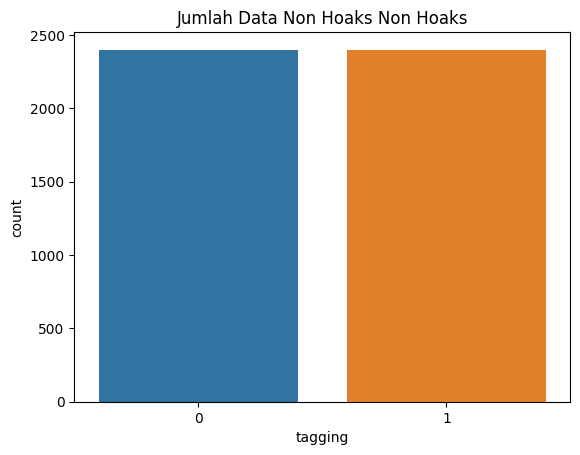

In [2]:
#Data Cek Jumlah Berita Hoaks dan NonHoaks
labels = data['tagging']
print(labels.head())

target = labels.value_counts()
print(target)

totalfake = target[0]
totalnonfake = target[1]

#membuat grafik
sns.countplot(x='tagging', data=data)
plt.title('Jumlah Data Non Hoaks Non Hoaks')
plt.show()

In [3]:
#mengecek apakah ada data yang kosong
print(data.isnull().sum())

Title      0
Text       0
Label      0
tagging    0
dtype: int64


In [4]:
#mengecilkan huruf pada data
data['berita'] = data['Text'].str.lower() + ' ' + data['Title'].str.lower()
print(data['berita'].head())

0    unggahan video tentang suara azan dapat melema...
1    dua umpan sensasional bek kanan liverpool tren...
2    pengembang utama vaksin virus corona (covid-19...
3    informasi yang salah. belum ada penelitian yan...
4    beberapa akun facebook mengunggah video yang d...
Name: berita, dtype: object


In [5]:
#cek apakah ada link
# data['berita'] = data['berita'].str.contains('http') | data['berita'].str.contains('www')
# print(data['berita'].head())

#menghapus link pada data
data['berita'] = data['berita'].str.replace(r'http\S+', '')
data['berita'] = data['berita'].str.replace(r'www\S+', '')
print(data['berita'].head())

0    unggahan video tentang suara azan dapat melema...
1    dua umpan sensasional bek kanan liverpool tren...
2    pengembang utama vaksin virus corona (covid-19...
3    informasi yang salah. belum ada penelitian yan...
4    beberapa akun facebook mengunggah video yang d...
Name: berita, dtype: object


C:\Users\Yosef Adrian\AppData\Local\Temp\ipykernel_13220\2631292692.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['berita'] = data['berita'].str.replace(r'http\S+', '')
C:\Users\Yosef Adrian\AppData\Local\Temp\ipykernel_13220\2631292692.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['berita'] = data['berita'].str.replace(r'www\S+', '')


In [6]:
#menghapus tanda baca
data['berita'] = data['berita'].str.replace('[^\w\s]','')
#menghapus angka
data['berita'] = data['berita'].str.replace('\d','')

print(data['berita'].head())

C:\Users\Yosef Adrian\AppData\Local\Temp\ipykernel_13220\609940037.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['berita'] = data['berita'].str.replace('[^\w\s]','')
C:\Users\Yosef Adrian\AppData\Local\Temp\ipykernel_13220\609940037.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['berita'] = data['berita'].str.replace('\d','')


0    unggahan video tentang suara azan dapat melema...
1    dua umpan sensasional bek kanan liverpool tren...
2    pengembang utama vaksin virus corona covid bua...
3    informasi yang salah belum ada penelitian yang...
4    beberapa akun facebook mengunggah video yang d...
Name: berita, dtype: object


In [7]:
# tokenisasi
data['berita'] = data['berita'].str.split()
print(data['berita'].head())

0    [unggahan, video, tentang, suara, azan, dapat,...
1    [dua, umpan, sensasional, bek, kanan, liverpoo...
2    [pengembang, utama, vaksin, virus, corona, cov...
3    [informasi, yang, salah, belum, ada, penelitia...
4    [beberapa, akun, facebook, mengunggah, video, ...
Name: berita, dtype: object


In [8]:
# perbaiki kata yang salah dengan menggunakan library PyEnchant
# from Sastrawi.Spelling.SpellingChecker import SpellingChecker

In [9]:
# menghapus stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
# print(stopword)

#menghapus stopword
data['berita'] = data['berita'].apply(lambda x: [item for item in x if item not in stopword])
print(data['berita'].head())

0    [unggahan, video, suara, azan, melemahkan, vir...
1    [umpan, sensasional, bek, kanan, liverpool, tr...
2    [pengembang, utama, vaksin, virus, corona, cov...
3    [informasi, salah, penelitian, membuktikan, kl...
4    [beberapa, akun, facebook, mengunggah, video, ...
Name: berita, dtype: object


In [10]:
#print stopword
print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [11]:
#stemming atau mengubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['berita'] = data['berita'].apply(lambda x: [stemmer.stem(item) for item in x])
print(data['berita'].head())

0    [unggah, video, suara, azan, lemah, virus, cor...
1    [umpan, sensasional, bek, kanan, liverpool, tr...
2    [kembang, utama, vaksin, virus, corona, covid,...
3    [informasi, salah, teliti, bukti, klaim, sebut...
4    [beberapa, akun, facebook, unggah, video, sert...
Name: berita, dtype: object


In [12]:
#menggabungkan kata
data['berita'] = data['berita'].apply(lambda x: ' '.join(x))
print(data['berita'].head())

0    unggah video suara azan lemah virus corona ben...
1    umpan sensasional bek kanan liverpool trent al...
2    kembang utama vaksin virus corona covid buat o...
3    informasi salah teliti bukti klaim sebut asam ...
4    beberapa akun facebook unggah video serta nara...
Name: berita, dtype: object


In [13]:
#membagi data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(data['berita'], labels, test_size=0.2, random_state=0)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#menggunakan TF-IDF untuk mengubah data menjadi vektor
# ngram_range digunakan untuk mengubah kata menjadi 2 kata
# ngram_range=(1,2) digunakan untuk mengubah kata menjadi 2 kata unigram dan bigram
tfidf = TfidfVectorizer(ngram_range=(2,2))
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [15]:
#print hasil vektorisasi x_train
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(3840, 473601)
(960, 473601)


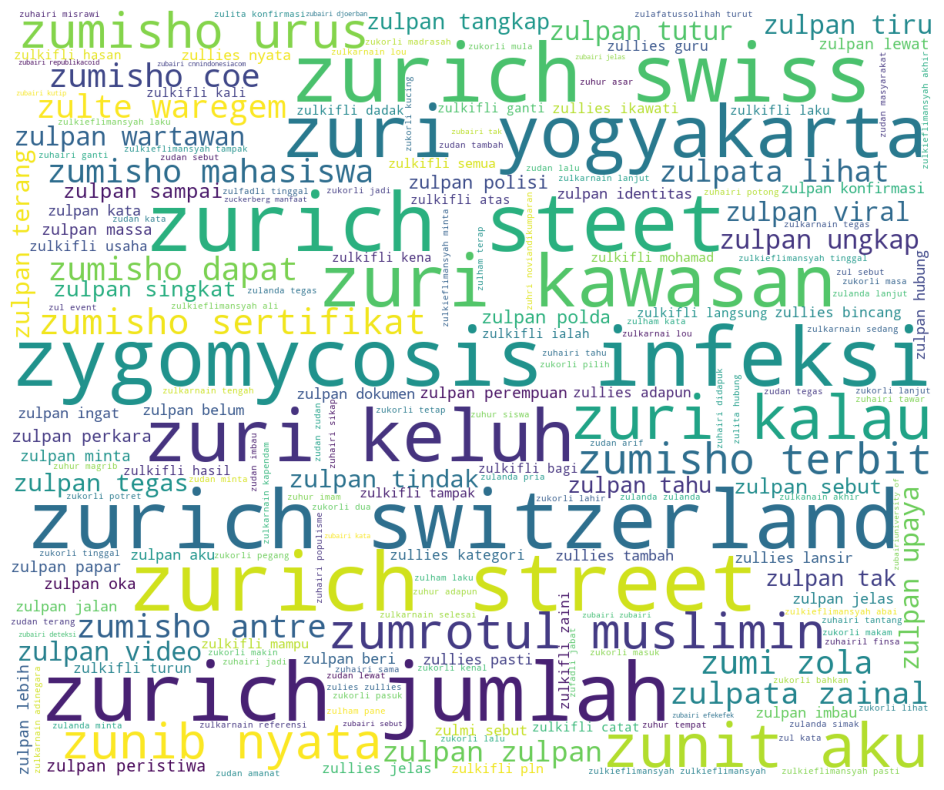

In [16]:
# menyimpan tfidf ke csv
# tfidf_df = pd.DataFrame(x_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
# tfidf_df.to_csv('tfidf.csv', index=False)

# buat wordcloud tfidf
# fungsi wordcloud untuk menampilkan kata yang paling sering muncul berdasarkan tfidf dimana ukuran kata menunjukkan frekuensi kata tersebut
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white', width=1200, height=1000).generate_from_frequencies(tfidf.vocabulary_)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

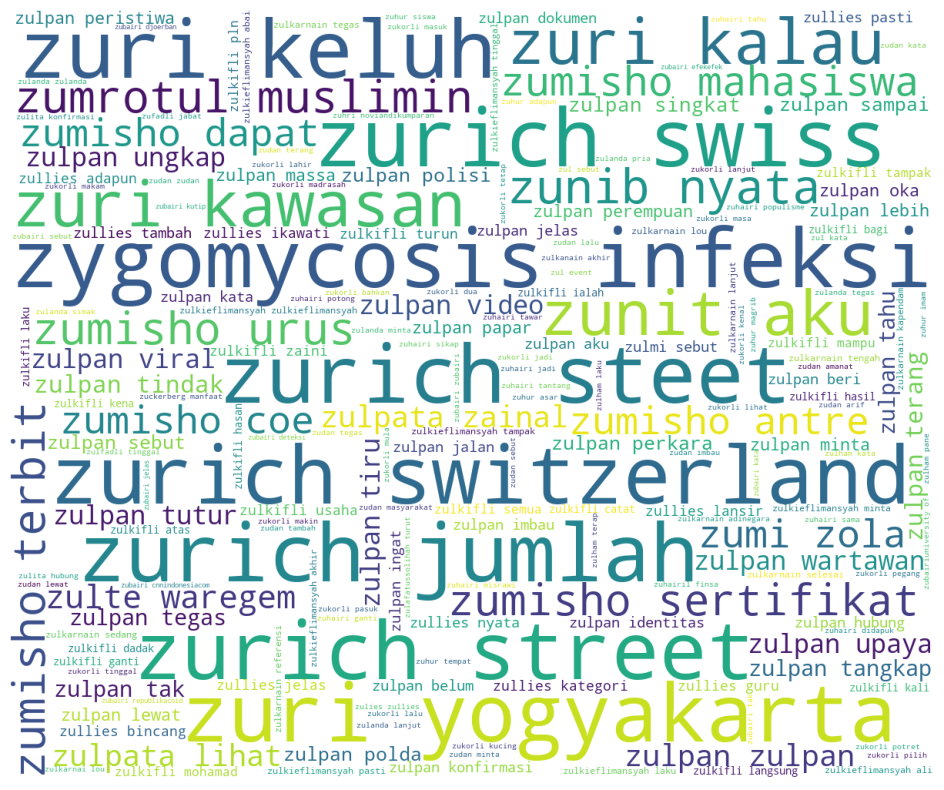

In [17]:
#WordCloud untuk data berita hoaks
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white', width=1200, height=1000).generate_from_frequencies(tfidf.vocabulary_)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


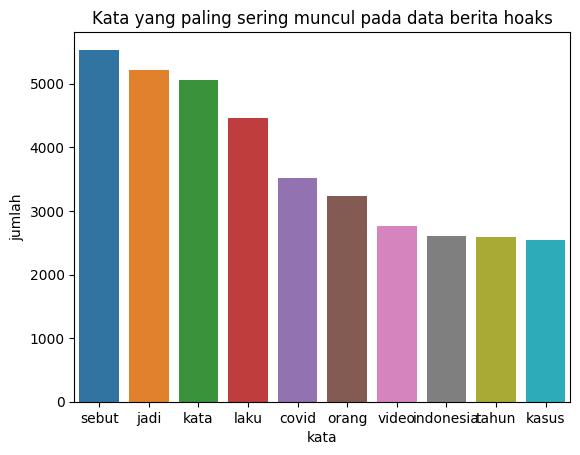

In [18]:
#buat kata yang paling sering muncul pada data hoaks
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# kegunaaan Counter adalah untuk menghitung jumlah kata yang muncul
# kegunaan matplotlib.pyplot adalah untuk membuat grafik
# kegunaan seaborn adalah untuk membuat grafik

# perbedaan matplotlib dan seaborn adalah matplotlib lebih sederhana dan lebih mudah digunakan

#mengambil data berita hoaks
data_hoaks = data[data['tagging'] == 0]
#mengubah data berita hoaks menjadi string
data_hoaks = data_hoaks['berita'].str.cat(sep=' ')
#mengubah data berita hoaks menjadi list
data_hoaks = data_hoaks.split()
#menghitung jumlah kata pada data berita hoaks
data_hoaks = Counter(data_hoaks)
#mengambil 10 kata yang paling sering muncul
data_hoaks = data_hoaks.most_common(10)
#membuat dataframe
data_hoaks = pd.DataFrame(data_hoaks, columns=['kata', 'jumlah'])
#membuat grafik
sns.barplot(x='kata', y='jumlah', data=data_hoaks)
plt.title('Kata yang paling sering muncul pada data berita hoaks')
plt.show()


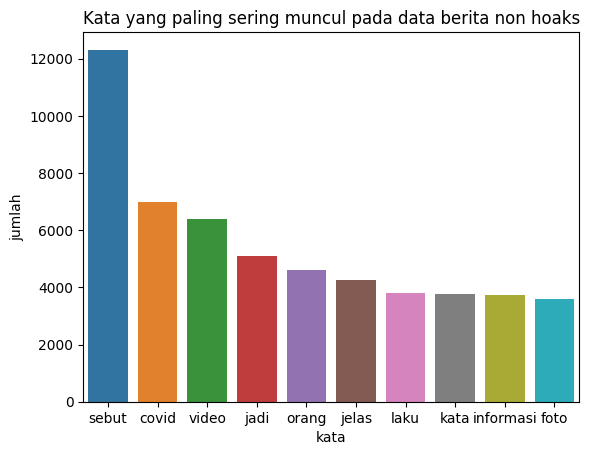

In [19]:
#buat kata yang paling sering muncul pada data non hoaks
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#mengambil data berita non hoaks
data_nonhoaks = data[data['tagging'] == 1]
#mengubah data berita non hoaks menjadi string
data_nonhoaks = data_nonhoaks['berita'].str.cat(sep=' ')
#mengubah data berita non hoaks menjadi list
data_nonhoaks = data_nonhoaks.split()
#menghitung jumlah kata pada data berita non hoaks
data_nonhoaks = Counter(data_nonhoaks)
#mengambil 10 kata yang paling sering muncul
data_nonhoaks = data_nonhoaks.most_common(10)
#membuat dataframe
data_nonhoaks = pd.DataFrame(data_nonhoaks, columns=['kata', 'jumlah'])
#membuat grafik
sns.barplot(x='kata', y='jumlah', data=data_nonhoaks)
plt.title('Kata yang paling sering muncul pada data berita non hoaks')
plt.show()

Kata paling sering muncul: ['desa wisata' 'ikan fugu' 'juta juta' 'mbah minto' 'jakarta jalan'
 'cacing krem' 'air kencing' 'rawan siaga' 'syafri harto'
 'masjid istiqlal']
Kata paling jarang muncul: ['dreamland resort' 'sebut hotel' 'resort bal' 'jadwal karyawan'
 'resort dkk' 'grand livio' 'pullman hotel' 'optimistis pandemi'
 'resort minyak' 'resort ubud']


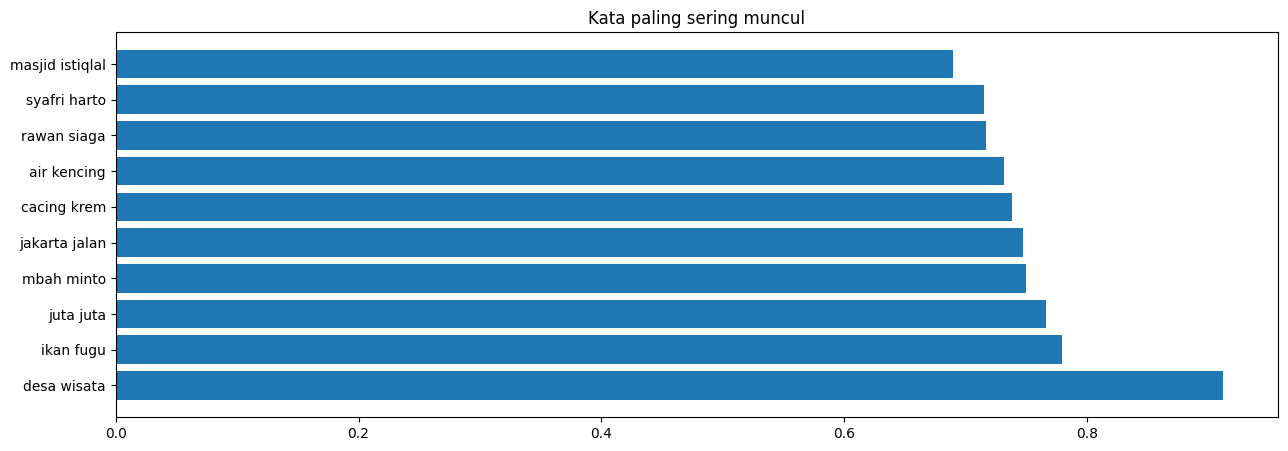

In [20]:
# membuat grafik hasil TF-IDF
#mengambil 10 kata yang paling sering muncul
feature_names = np.array(tfidf.get_feature_names_out())
sorted_tfidf_index = x_train_tfidf.max(0).toarray()[0].argsort()
print("Kata paling sering muncul: {}".format(feature_names[sorted_tfidf_index[:-11:-1]]))
print("Kata paling jarang muncul: {}".format(feature_names[sorted_tfidf_index[:10]]))

#membuat grafik
plt.figure(figsize=(15, 5))
plt.title('Kata paling sering muncul')
plt.barh(feature_names[sorted_tfidf_index[:-11:-1]], x_train_tfidf.max(0).toarray()[0][sorted_tfidf_index[:-11:-1]])
plt.show()

   aa afi  aa aku  aa balvinmontero  aa dukung  aa flh  aa iky  aa lanyalla  \
0     0.0     0.0               0.0        0.0     0.0     0.0          0.0   
1     0.0     0.0               0.0        0.0     0.0     0.0          0.0   
2     0.0     0.0               0.0        0.0     0.0     0.0          0.0   
3     0.0     0.0               0.0        0.0     0.0     0.0          0.0   
4     0.0     0.0               0.0        0.0     0.0     0.0          0.0   

   aa mapolres  aa umbara  aa warga  ...  zuri kalau  zuri kawasan  \
0          0.0        0.0       0.0  ...         0.0           0.0   
1          0.0        0.0       0.0  ...         0.0           0.0   
2          0.0        0.0       0.0  ...         0.0           0.0   
3          0.0        0.0       0.0  ...         0.0           0.0   
4          0.0        0.0       0.0  ...         0.0           0.0   

   zuri keluh  zuri yogyakarta  zurich jumlah  zurich steet  zurich street  \
0         0.0             

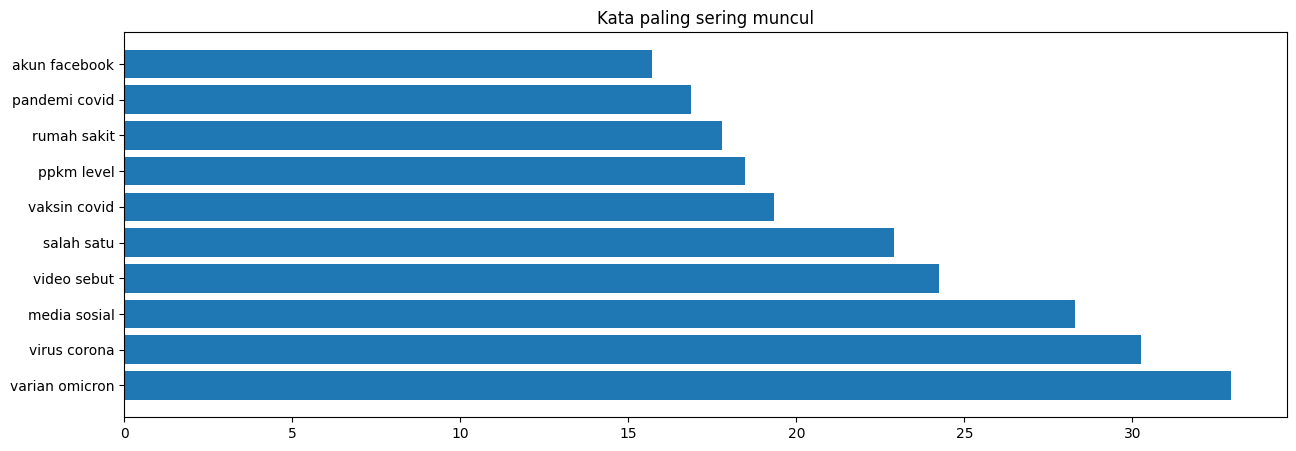

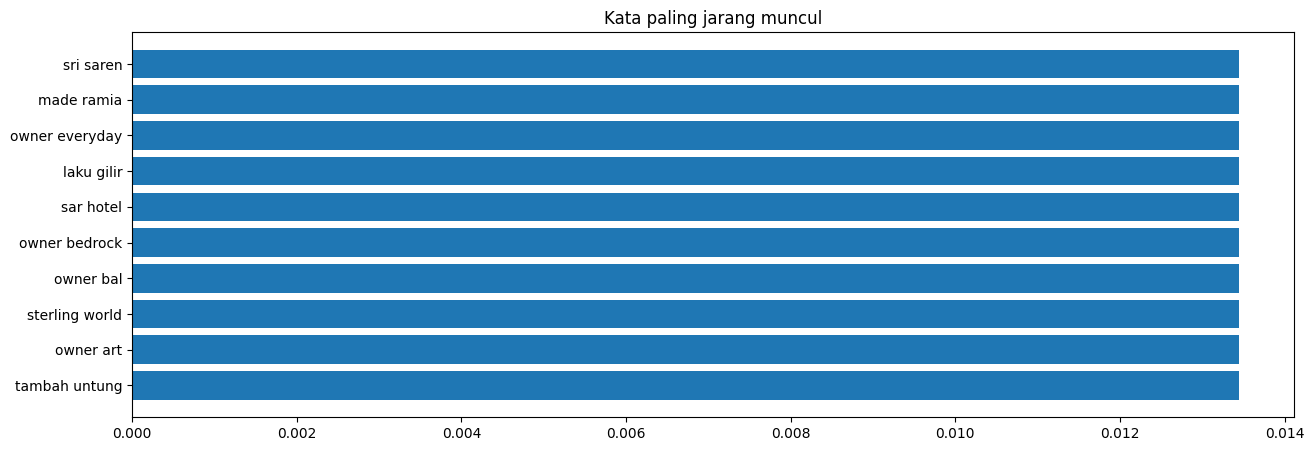

In [21]:
# membuat visualisasi data dari TFIDF dengan menggunakan Pandas
#mengubah data menjadi dataframe
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
print(x_train_tfidf_df.head())

#membuat grafik
plt.figure(figsize=(15, 5))
plt.title('Kata paling sering muncul')
plt.barh(x_train_tfidf_df.sum().sort_values(ascending=False).index[:10], x_train_tfidf_df.sum().sort_values(ascending=False).values[:10])
plt.show()

#membuat grafik
plt.figure(figsize=(15, 5))
plt.title('Kata paling jarang muncul')
plt.barh(x_train_tfidf_df.sum().sort_values(ascending=True).index[:10], x_train_tfidf_df.sum().sort_values(ascending=True).values[:10])
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
#menggunakan model Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(x_train_tfidf, y_train)

LogisticRegression()

In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
#menggunakan model Passive Aggressive Classifier
ModelPAC = PassiveAggressiveClassifier(shuffle=False,C=0.15)
#max_iter=7, C=0.5, shuffle=False

#model PAC standar
modelPAC2 = PassiveAggressiveClassifier(shuffle=False,C=1.0)

#modwl PAC best fit
modelPAC3 = PassiveAggressiveClassifier(C= 0.15, loss= 'hinge', max_iter= 15, shuffle= False, tol= 0.05)

#model PAC with max_iter=7
modelPAC4 = PassiveAggressiveClassifier(max_iter=7, C=0.5, shuffle=False)

#model PAC C=0.6, loss='squared_hinge', tol=0.01
modelPAC5 = PassiveAggressiveClassifier(C=0.6, loss='squared_hinge', tol=0.01)

# In this paper, we presented various methods for Fake News detection using Machine Learning. We created our dataset
# which includes Indian news articles as well. Our result shows that by using TF-IDF Vectorizer with Passive Aggressive
# algorithm, and by changing regularization parameter to 0.6, we ended up obtaining an accuracy of 93.90%.

#Reference : A COMPARATIVE STUDY of FAKE NEWS DETECTION USING NATURAL LANGUAGE PROCESSING and MACHINE LEARNING
ModelPAC.fit(x_train_tfidf, y_train)
modelPAC2.fit(x_train_tfidf, y_train)
modelPAC3.fit(x_train_tfidf, y_train)
modelPAC4.fit(x_train_tfidf, y_train)
modelPAC5.fit(x_train_tfidf, y_train)

c:\Users\Yosef Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(C=0.6, loss='squared_hinge', tol=0.01)

In [24]:
#prediksikan data testing
y_predLR = modelLR.predict(x_test_tfidf)
y_predPAC = ModelPAC.predict(x_test_tfidf)
y_predPAC2 = modelPAC2.predict(x_test_tfidf)
y_predPAC3 = modelPAC3.predict(x_test_tfidf)
y_predPAC4 = modelPAC4.predict(x_test_tfidf)
y_predPAC5 = modelPAC5.predict(x_test_tfidf)

Akurasi Logistic Regression:  0.9739583333333334
Akurasi Passive Aggressive Classifier:  0.9864583333333333
Akurasi Passive Aggressive Classifier Standar:  0.9854166666666667
Akurasi Passive Aggressive Classifier Best Fit:  0.9864583333333333
Akurasi Passive Aggressive Classifier max_iter=7:  0.9854166666666667
Akurasi Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01:  0.984375
Precision Score Logistic Regression:  0.9851694915254238
Precision Score Passive Aggressive Classifier:  0.9875518672199171
Precision Score Passive Aggressive Classifier Standar:  0.9875259875259875
Precision Score Passive Aggressive Classifier Best Fit:  0.9875518672199171
Precision Score Passive Aggressive Classifier max_iter=7:  0.9875259875259875
Precision Score Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01:  0.9875
Recall Score Logistic Regression:  0.9627329192546584
Recall Score Passive Aggressive Classifier:  0.9855072463768116
Recall Score Passive Aggressive Classifi

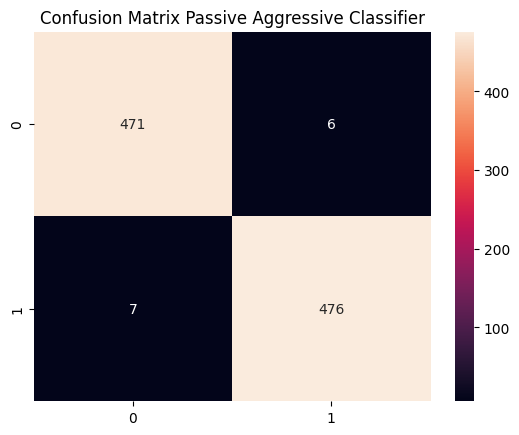

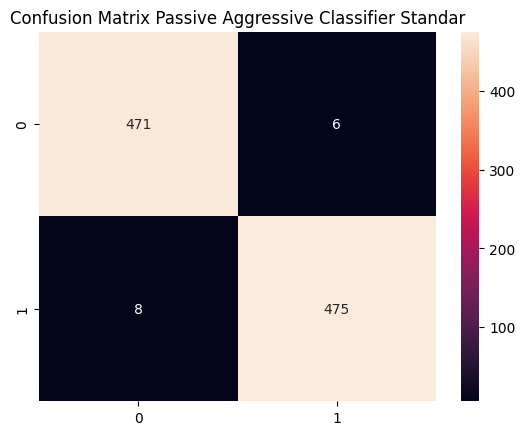

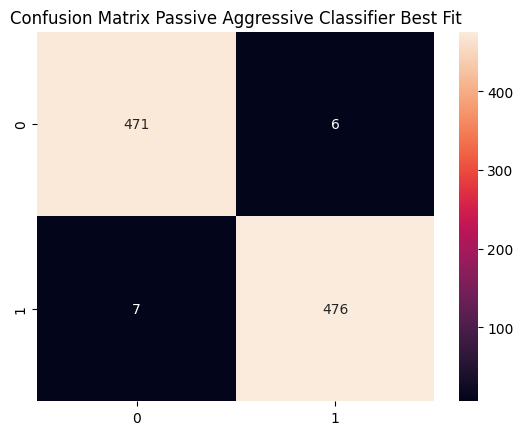

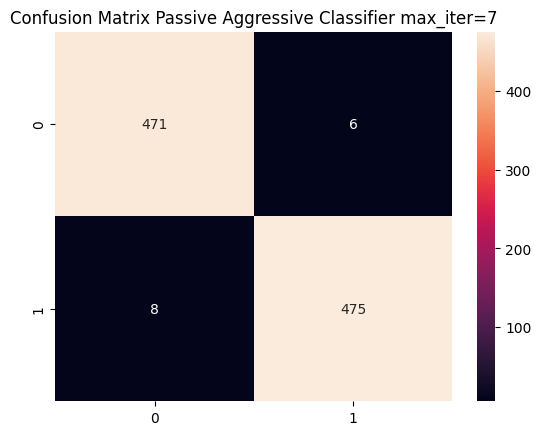

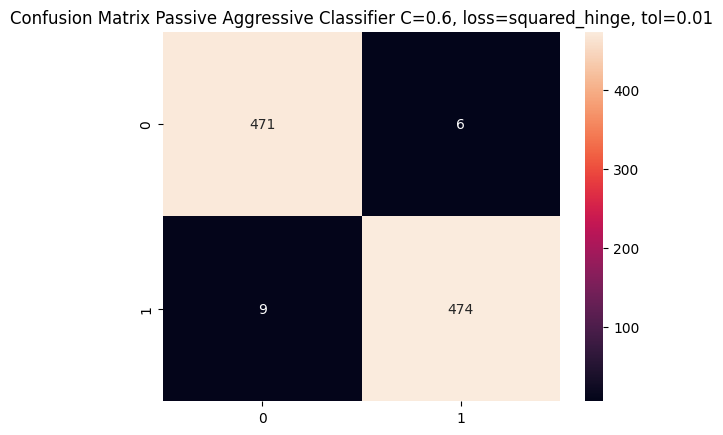

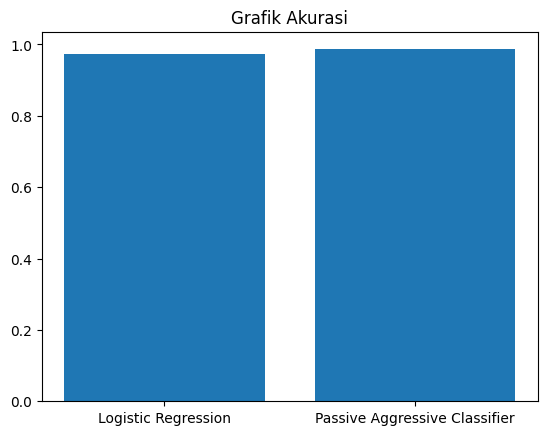

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
#menghitung akurasi
print('Akurasi Logistic Regression: ', accuracy_score(y_test, y_predLR))
print('Akurasi Passive Aggressive Classifier: ', accuracy_score(y_test, y_predPAC))
print('Akurasi Passive Aggressive Classifier Standar: ', accuracy_score(y_test, y_predPAC2))
print('Akurasi Passive Aggressive Classifier Best Fit: ', accuracy_score(y_test, y_predPAC3))
print('Akurasi Passive Aggressive Classifier max_iter=7: ', accuracy_score(y_test, y_predPAC4))
print('Akurasi Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01: ', accuracy_score(y_test, y_predPAC5))

#menghitung precision
print('Precision Score Logistic Regression: ', precision_score(y_test, y_predLR))
print('Precision Score Passive Aggressive Classifier: ', precision_score(y_test, y_predPAC))
print('Precision Score Passive Aggressive Classifier Standar: ', precision_score(y_test, y_predPAC2))
print('Precision Score Passive Aggressive Classifier Best Fit: ', precision_score(y_test, y_predPAC3))
print('Precision Score Passive Aggressive Classifier max_iter=7: ', precision_score(y_test, y_predPAC4))
print('Precision Score Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01: ', precision_score(y_test, y_predPAC5))

#menghitung recall
print('Recall Score Logistic Regression: ', recall_score(y_test, y_predLR))
print('Recall Score Passive Aggressive Classifier: ', recall_score(y_test, y_predPAC))
print('Recall Score Passive Aggressive Classifier Standar: ', recall_score(y_test, y_predPAC2))
print('Recall Score Passive Aggressive Classifier Best Fit: ', recall_score(y_test, y_predPAC3))
print('Recall Score Passive Aggressive Classifier max_iter=7: ', recall_score(y_test, y_predPAC4))
print('Recall Score Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01: ', recall_score(y_test, y_predPAC5))

#menghitung f1-score
print('F1 Score Logistic Regression: ', f1_score(y_test, y_predLR))
print('F1 Score Passive Aggressive Classifier: ', f1_score(y_test, y_predPAC))
print('F1 Score Passive Aggressive Classifier Standar: ', f1_score(y_test, y_predPAC2))
print('F1 Score Passive Aggressive Classifier Best Fit: ', f1_score(y_test, y_predPAC3))
print('F1 Score Passive Aggressive Classifier max_iter=7: ', f1_score(y_test, y_predPAC4))
print('F1 Score Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01: ', f1_score(y_test, y_predPAC5))

#membuat confusion matrix
cmPAC = confusion_matrix(y_test, y_predPAC)
cmPAC2 = confusion_matrix(y_test, y_predPAC2)
cmPAC3 = confusion_matrix(y_test, y_predPAC3)
cmPAC4 = confusion_matrix(y_test, y_predPAC4)
cmPAC5 = confusion_matrix(y_test, y_predPAC5)

#membuat grafik confusion matrix
sns.heatmap(cmPAC, annot=True, fmt='d')
plt.title('Confusion Matrix Passive Aggressive Classifier')
plt.show()

#membuat grafik confusion matrix
sns.heatmap(cmPAC2, annot=True, fmt='d')
plt.title('Confusion Matrix Passive Aggressive Classifier Standar')
plt.show()

#membuat grafik confusion matrix
sns.heatmap(cmPAC3, annot=True, fmt='d')
plt.title('Confusion Matrix Passive Aggressive Classifier Best Fit')
plt.show()

#membuat grafik confusion matrix
sns.heatmap(cmPAC4, annot=True, fmt='d')
plt.title('Confusion Matrix Passive Aggressive Classifier max_iter=7')
plt.show()

#membuat grafik confusion matrix
sns.heatmap(cmPAC5, annot=True, fmt='d')
plt.title('Confusion Matrix Passive Aggressive Classifier C=0.6, loss=squared_hinge, tol=0.01')
plt.show()

#membuat grafik akurasi
akurasi = [accuracy_score(y_test, y_predLR), accuracy_score(y_test, y_predPAC)]
model = ['Logistic Regression', 'Passive Aggressive Classifier']
plt.bar(model, akurasi)
plt.title('Grafik Akurasi')
plt.show()

In [26]:
#mengecek overfitting dan underfitting
print('Akurasi Logistic Regression: ', accuracy_score(y_train, modelLR.predict(x_train_tfidf)))
print('Akurasi Passive Aggressive Classifier: ', accuracy_score(y_train, ModelPAC.predict(x_train_tfidf)))
print('Akurasi Passive Aggressive Classifier Standar: ', accuracy_score(y_train, modelPAC2.predict(x_train_tfidf)))
print('Akurasi Passive Aggressive Classifier Best Fit: ', accuracy_score(y_train, modelPAC3.predict(x_train_tfidf)))
print('Akurasi Passive Aggressive Classifier max_iter=7: ', accuracy_score(y_train, modelPAC4.predict(x_train_tfidf)))
print('Akurasi Passive Aggressive Classifier C=0.5, max_iter=10, tol=0.0005: ', accuracy_score(y_train, modelPAC5.predict(x_train_tfidf)))

#mengecek overfit dan underfit via data testing
print('Akurasi Logistic Regression: ', accuracy_score(y_test, y_predLR))
print('Akurasi Passive Aggressive Classifier: ', accuracy_score(y_test, y_predPAC))
print('Akurasi Passive Aggressive Classifier Standar: ', accuracy_score(y_test, y_predPAC2))
print('Akurasi Passive Aggressive Classifier Best Fit: ', accuracy_score(y_test, y_predPAC3))
print('Akurasi Passive Aggressive Classifier max_iter=7: ', accuracy_score(y_test, y_predPAC4))
print('Akurasi Passive Aggressive Classifier C=0.5, max_iter=10, tol=0.0005: ', accuracy_score(y_test, y_predPAC5))

Akurasi Logistic Regression:  0.9997395833333333
Akurasi Passive Aggressive Classifier:  1.0
Akurasi Passive Aggressive Classifier Standar:  1.0
Akurasi Passive Aggressive Classifier Best Fit:  1.0
Akurasi Passive Aggressive Classifier max_iter=7:  1.0
Akurasi Passive Aggressive Classifier C=0.5, max_iter=10, tol=0.0005:  1.0
Akurasi Logistic Regression:  0.9739583333333334
Akurasi Passive Aggressive Classifier:  0.9864583333333333
Akurasi Passive Aggressive Classifier Standar:  0.9854166666666667
Akurasi Passive Aggressive Classifier Best Fit:  0.9864583333333333
Akurasi Passive Aggressive Classifier max_iter=7:  0.9854166666666667
Akurasi Passive Aggressive Classifier C=0.5, max_iter=10, tol=0.0005:  0.984375


In [139]:
#membuat hyperparameter tuning untuk Passive Aggressive Classifier
from sklearn.model_selection import GridSearchCV

#membuat parameter untuk tuning
param = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'max_iter': [1,10,100,1000,10000],
         'tol': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
         'loss': ['hinge', 'squared_hinge']
        },

#membuat model
modelPAC = PassiveAggressiveClassifier()
#membuat random search
grid_search = GridSearchCV(modelPAC, param, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
#fit data
grid_search.fit(x_train_tfidf, y_train)
#menampilkan hasil
print('Best Score: ', grid_search.best_score_)
print('Best Parameter: ', grid_search.best_params_)
print('Best Estimator: ', grid_search.best_estimator_)


Fitting 4 folds for each of 900 candidates, totalling 3600 fits
Best Score:  0.978125
Best Parameter:  {'C': 0.3, 'loss': 'hinge', 'max_iter': 10, 'tol': 0.001}
Best Estimator:  PassiveAggressiveClassifier(C=0.3, max_iter=10)


c:\Users\Yosef Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


c:\Users\Yosef Adrian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Akurasi Passive Aggressive Classifier:  0.9875
Precision Score Passive Aggressive Classifier:  0.9875776397515528
Recall Score Passive Aggressive Classifier:  0.9875776397515528
F1 Score Passive Aggressive Classifier:  0.9875776397515528


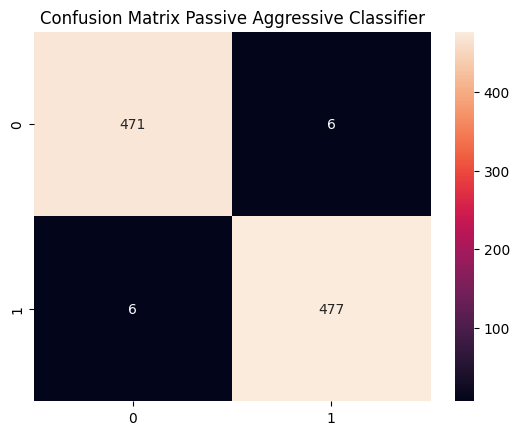

In [140]:
# mengambil nilai parameter terbaik ke variabel
best_param = grid_search.best_estimator_
best_param.fit(x_train_tfidf, y_train)

#evaluasi
y_predPAC = best_param.predict(x_test_tfidf)
print('Akurasi Passive Aggressive Classifier: ', accuracy_score(y_test, y_predPAC))
print('Precision Score Passive Aggressive Classifier: ', precision_score(y_test, y_predPAC))
print('Recall Score Passive Aggressive Classifier: ', recall_score(y_test, y_predPAC))
print('F1 Score Passive Aggressive Classifier: ', f1_score(y_test, y_predPAC))
cm = confusion_matrix(y_test, y_predPAC)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix Passive Aggressive Classifier')
plt.show()

In [141]:
# menyimpan model Passive Aggressive Classifier
# import pickle
# pickle.dump(modelPAChyper, open('deteksi_hoaks_akurasi_tertinggi_PAC.pkl', 'wb'))

In [142]:
# # load model Passive Aggressive Classifier
# model = pickle.load(open('deteksi_hoaks_akurasi_tertinggi_PAC.pkl', 'rb'))

# # uji coba model
# datauji = input('Masukkan data uji: ')
# datauji = [datauji]
# datauji = pd.DataFrame(datauji, columns=['berita'])

# #preprocessing data uji
# datauji['berita'] = datauji['berita'].apply(lambda x: x.lower())
# # datauji['berita'] = datauji['berita'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
# datauji['berita'] = datauji['berita'].apply(lambda x: x.split())
# datauji['berita'] = datauji['berita'].apply(lambda x: [stemmer.stem(word) for word in x])
# datauji['berita'] = datauji['berita'].apply(lambda x: ' '.join(x))

# #mengubah data uji menjadi tfidf
# tfidf_uji = tfidf.transform(datauji['berita'])

# prediksi = ModelPAC.predict(tfidf_uji)
# if prediksi == 1:
#     print('Berita ini adalah berita HOAX')
# else:
#     print('Berita ini adalah berita NON HOAX')
    

In [143]:
# uji coba model PAC menggunakan dataset lain
# membaca data uji
# datauji = pd.read_excel('DataLatihBDC.xlsx')
# datauji = datauji.dropna()
# datauji = datauji.reset_index(drop=True)

In [144]:
# # preprocessing data uji
# # case folding
# datauji['narasi'] = datauji['narasi'].apply(lambda x: x.lower())

# #menghapus link pada data
# datauji['narasi'] = datauji['narasi'].str.replace(r'http\S+', '')
# datauji['narasi'] = datauji['narasi'].str.replace(r'www\S+', '')

# #menghapus tanda baca
# datauji['narasi'] = datauji['narasi'].str.replace('[^\w\s]','')
# #menghapus angka
# datauji['narasi'] = datauji['narasi'].str.replace('\d','')

# #tokenisasi
# datauji['narasi'] = datauji['narasi'].apply(lambda x: x.split())

# #menghapus stopword
# datauji['narasi'] = datauji['narasi'].apply(lambda x: [word for word in x if word not in stopword])

# #stemming
# datauji['narasi'] = datauji['narasi'].apply(lambda x: [stemmer.stem(word) for word in x])

# #menggabungkan kata
# datauji['narasi'] = datauji['narasi'].apply(lambda x: ' '.join(x))

In [145]:
# # # mengubah data uji menjadi tfidf
# tfidf_uji = tfidf.transform(datauji['narasi'])

In [146]:
# # uji coba model dari data uji
# prediksi = ModelPAC.predict(tfidf_uji)
# prediksi2 = modelPAC2.predict(tfidf_uji)
# prediksi3 = modelPAC3.predict(tfidf_uji)
# prediksi4 = modelPAC4.predict(tfidf_uji)
# prediksi5 = modelPAChyper.predict(tfidf_uji)

# # from keras.models import load_model
# # model = load_model('model.h5')
# # prediksi6 = model.predict(tfidf_uji)


# print('Akurasi Model PAC 1: ', accuracy_score(datauji['label'], prediksi))
# print('Confusion Matrix Model PAC 2: ', confusion_matrix(datauji['label'], prediksi))

# print('Akurasi Model PAC 2: ', accuracy_score(datauji['label'], prediksi2))
# print('Confusion Matrix Model PAC 2: ', confusion_matrix(datauji['label'], prediksi2))

# print('Akurasi Model PAC 3: ', accuracy_score(datauji['label'], prediksi3))
# print('Confusion Matrix Model PAC 3: ', confusion_matrix(datauji['label'], prediksi3))

# print('Akurasi Model PAC 4 (Best Fit): ', accuracy_score(datauji['label'], prediksi4))
# print('Confusion Matrix Model PAC 4 (Best Fit): ', confusion_matrix(datauji['label'], prediksi4))

# print('Akurasi Model PAC 5 (Hyperparameter): ', accuracy_score(datauji['label'], prediksi5))
# print('Confusion Matrix Model PAC 5 (Best Fit): ', confusion_matrix(datauji['label'], prediksi5))



# #membuat grafik akurasi
# akurasi = [accuracy_score(datauji['label'], prediksi), accuracy_score(datauji['label'], prediksi2), accuracy_score(datauji['label'], prediksi3),
#            accuracy_score(datauji['label'], prediksi4), accuracy_score(datauji['label'], prediksi5)]
# model = ['Passive Aggressive Classifier', 'Passive Aggressive Classifier Standar', 'Passive Aggressive Classifier Best Fit', 
#          'PAC 4','Passive Aggressive Classifier Hyperparameter Tuning']
# plt.bar(model, akurasi)
# plt.title('Grafik Akurasi')
# plt.show()